<a href="https://colab.research.google.com/github/saeedabi1/Deep_Learning_CMPE_258/blob/master/b_Redo_the_keras_colab_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning assignment - Mirsaeid Abolghasemi**

b) Redo the keras  colab 
**For CIFAR-10 dataset**

---



In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [7]:
help(tf.keras.datasets)

Help on package tensorflow_core.python.keras.api._v2.keras.datasets in tensorflow_core.python.keras.api._v2.keras:

NAME
    tensorflow_core.python.keras.api._v2.keras.datasets - Public API for tf.keras.datasets namespace.

PACKAGE CONTENTS
    boston_housing (package)
    cifar10 (package)
    cifar100 (package)
    fashion_mnist (package)
    imdb (package)
    mnist (package)
    reuters (package)

FILE
    /tensorflow-2.1.0/python3.6/tensorflow_core/python/keras/api/_v2/keras/datasets/__init__.py




Import the dataset

In [0]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
#The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes,
# with 6000 images per class. 
#There are 50000 training images and 10000 test images.
#Here are the classes in the datase:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [31]:
train_images.shape

(50000, 32, 32, 3)

In [32]:
len(train_labels)

50000

In [33]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [34]:
test_images.shape

(10000, 32, 32, 3)

In [35]:
len(test_labels)

10000

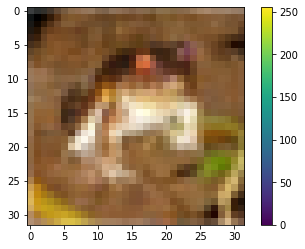

In [36]:
#Preprocess the data - If you inspect the first image in the training set, 
#you will see that the pixel values fall in the range of 0 to 255:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. 
train_images = train_images / 255.0

test_images = test_images / 255.0

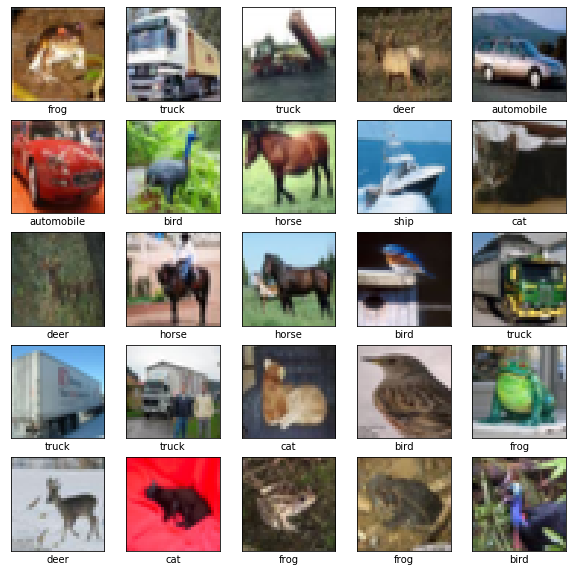

In [41]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #casting to integer because only integer scalar arrays can be converted to a scalar index
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

In [0]:
#Build the model
#Building the neural network requires configuring the layers of the model,
# then compiling the model.
#Set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3)), # test_images.shape is (10000, 32, 32, 3) 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
#Compile the model
#These are added during the model's compile step: Loss function,Optimizer,Metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [51]:
#Train and feed the model 
model.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 165us/sample - loss: 1.9134 - accuracy: 0.3143
Epoch 2/10
50000/50000 [==============================] - 8s 157us/sample - loss: 1.7478 - accuracy: 0.3750
Epoch 3/10
50000/50000 [==============================] - 8s 152us/sample - loss: 1.6913 - accuracy: 0.3976
Epoch 4/10
50000/50000 [==============================] - 8s 154us/sample - loss: 1.6567 - accuracy: 0.4094
Epoch 5/10
50000/50000 [==============================] - 8s 151us/sample - loss: 1.6303 - accuracy: 0.4201
Epoch 6/10
50000/50000 [==============================] - 8s 155us/sample - loss: 1.6093 - accuracy: 0.4244
Epoch 7/10
50000/50000 [==============================] - 8s 161us/sample - loss: 1.5995 - accuracy: 0.4286
Epoch 8/10
50000/50000 [==============================] - 8s 163us/sample - loss: 1.5889 - accuracy: 0.4344
Epoch 9/10
50000/50000 [==============================] - 8s 165us/sample - loss: 1.5766 - accuracy: 0.4369
Epoch

In [52]:
#Evaluate accuracy
#compare how the model performs on the test dataset:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 1.5917 - accuracy: 0.4278

Test accuracy: 0.4278


In [0]:
#Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [55]:
predictions[0]

array([0.0626312 , 0.00397071, 0.18284234, 0.15238796, 0.14979684,
       0.11359933, 0.27087027, 0.0130521 , 0.04852619, 0.00232301],
      dtype=float32)

In [56]:
# To see which label has the highest confidence value:
np.argmax(predictions[0])

6

In [57]:
#Examining the test label shows that this classification is correct:
test_labels[0]

array([3], dtype=uint8)

In [0]:

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[int(true_label)].set_color('blue')

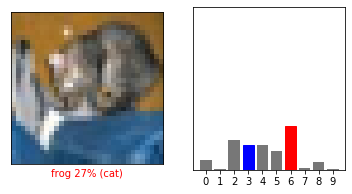

In [63]:
#Verify predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

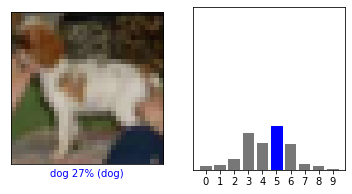

In [64]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

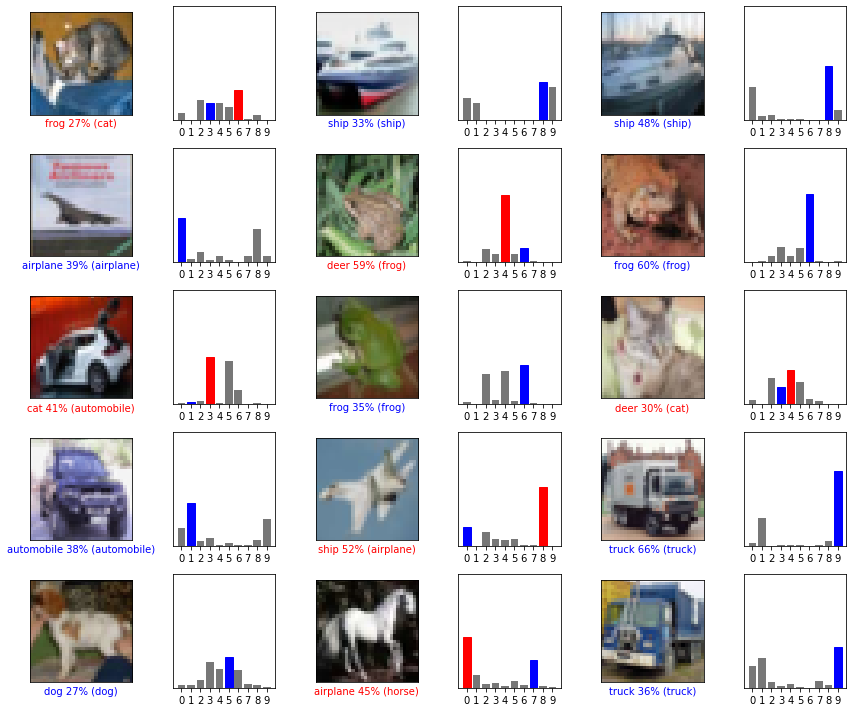

In [65]:
#plot several images with their predictions. 
#Note that the model can be wrong even when very confident.

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [67]:
#use the trained model to make a prediction about a single image.
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(32, 32, 3)


In [68]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


In [70]:
#predict the correct label for this image:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.9448635e-01 1.5457207e-01 7.6539502e-03 3.0601060e-03 5.0943578e-03
  2.2915539e-03 1.8901876e-04 5.2670215e-04 3.3476752e-01 2.9735836e-01]]


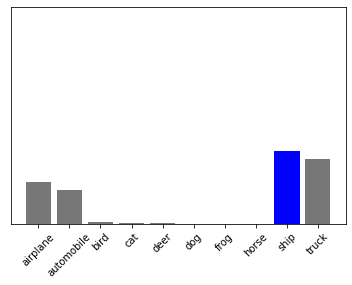

In [71]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [73]:
#the model predicts a label as expected.
np.argmax(predictions_single[0])

8